In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [11]:
df = pd.read_csv("data/tennis_stats.csv")

# Exploratory Data Analysis (EDA)

In [95]:
df.columns

Index(['Player', 'Year', 'FirstServe', 'FirstServePointsWon',
       'FirstServeReturnPointsWon', 'SecondServePointsWon',
       'SecondServeReturnPointsWon', 'Aces', 'BreakPointsConverted',
       'BreakPointsFaced', 'BreakPointsOpportunities', 'BreakPointsSaved',
       'DoubleFaults', 'ReturnGamesPlayed', 'ReturnGamesWon',
       'ReturnPointsWon', 'ServiceGamesPlayed', 'ServiceGamesWon',
       'TotalPointsWon', 'TotalServicePointsWon', 'Wins', 'Losses', 'Winnings',
       'Ranking'],
      dtype='object')

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1721 non-null   object 
 1   Year                        1721 non-null   int64  
 2   FirstServe                  1721 non-null   float64
 3   FirstServePointsWon         1721 non-null   float64
 4   FirstServeReturnPointsWon   1721 non-null   float64
 5   SecondServePointsWon        1721 non-null   float64
 6   SecondServeReturnPointsWon  1721 non-null   float64
 7   Aces                        1721 non-null   int64  
 8   BreakPointsConverted        1721 non-null   float64
 9   BreakPointsFaced            1721 non-null   int64  
 10  BreakPointsOpportunities    1721 non-null   int64  
 11  BreakPointsSaved            1721 non-null   float64
 12  DoubleFaults                1721 non-null   int64  
 13  ReturnGamesPlayed           1721 

In [12]:
df.head()

Player  Year  FirstServe  FirstServePointsWon  \
0           Pedro Sousa  2016        0.88                 0.50   
1       Roman Safiullin  2017        0.84                 0.62   
2           Pedro Sousa  2017        0.83                 0.60   
3   Rogerio Dutra Silva  2010        0.83                 0.64   
4  Daniel Gimeno-Traver  2017        0.81                 0.54   

   FirstServeReturnPointsWon  SecondServePointsWon  \
0                       0.38                  0.50   
1                       0.26                  0.33   
2                       0.28                  0.53   
3                       0.34                  0.59   
4                       0.00                  0.33   

   SecondServeReturnPointsWon  Aces  BreakPointsConverted  BreakPointsFaced  \
0                        0.39     0                  0.14                 7   
1                        0.07     7                  0.00                 7   
2                        0.44     2                  0.38                10   
3                        0.33     2                  0.33                 5   
4                        0.33     1                  0.00                 2   

   ...  ReturnGamesWon  ReturnPointsWon  ServiceGamesPlayed  ServiceGamesWon  \
0  ...            0.11             0.38                   8             0.50   
1  ...            0.00             0.20                   9             0.67   
2  ...            0.16             0.34                  17             0.65   
3  ...            0.14             0.34                  15             0.80   
4  ...            0.00             0.20                   2             0.50   

   TotalPointsWon  TotalServicePointsWon  Wins  Losses  Winnings  Ranking  
0            0.43                   0.50     1       2     39820      119  
1            0.41                   0.57     0       1     17334      381  
2            0.45                   0.59     4       1    109827      119  
3            0.49                   0.63     0       0      9761      125  
4            0.35                   0.50     0       1     32879      272  

[5 rows x 24 columns]

In [13]:
df.describe()

Year   FirstServe  FirstServePointsWon  \
count  1721.000000  1721.000000          1721.000000   
mean   2013.646717     0.598053             0.680738   
std       2.488018     0.054533             0.070422   
min    2009.000000     0.360000             0.270000   
25%    2012.000000     0.570000             0.650000   
50%    2014.000000     0.600000             0.690000   
75%    2016.000000     0.630000             0.720000   
max    2017.000000     0.880000             0.890000   

       FirstServeReturnPointsWon  SecondServePointsWon  \
count                1721.000000           1721.000000   
mean                    0.261673              0.479733   
std                     0.056639              0.066902   
min                     0.000000              0.060000   
25%                     0.240000              0.460000   
50%                     0.270000              0.490000   
75%                     0.290000              0.520000   
max                     0.480000              0.920000   

       SecondServeReturnPointsWon         Aces  BreakPointsConverted  \
count                 1721.000000  1721.000000           1721.000000   
mean                     0.466432    97.105171              0.369407   
std                      0.068447   137.966077              0.162987   
min                      0.000000     0.000000              0.000000   
25%                      0.440000     7.000000              0.320000   
50%                      0.480000    34.000000              0.380000   
75%                      0.500000   140.000000              0.430000   
max                      0.750000  1185.000000              1.000000   

       BreakPointsFaced  BreakPointsOpportunities  ...  ReturnGamesWon  \
count       1721.000000               1721.000000  ...     1721.000000   
mean         112.003486                102.918071  ...        0.173823   
std          119.247651                122.761670  ...        0.080880   
min            1.000000                  0.000000  ...        0.000000   
25%           15.000000                  9.000000  ...        0.130000   
50%           55.000000                 41.000000  ...        0.180000   
75%          201.000000                172.000000  ...        0.220000   
max          507.000000                573.000000  ...        0.560000   

       ReturnPointsWon  ServiceGamesPlayed  ServiceGamesWon  TotalPointsWon  \
count      1721.000000         1721.000000      1721.000000     1721.000000   
mean          0.342208          197.650203         0.715590        0.473155   
std           0.049369          221.208703         0.123287        0.037139   
min           0.000000            0.000000         0.000000        0.220000   
25%           0.320000           22.000000         0.670000        0.460000   
50%           0.350000           86.000000         0.750000        0.480000   
75%           0.370000          348.000000         0.790000        0.500000   
max           0.510000          916.000000         1.000000        0.820000   

       TotalServicePointsWon         Wins       Losses      Winnings  \
count            1721.000000  1721.000000  1721.000000  1.721000e+03   
mean                0.599245     7.876816     9.278908  2.344928e+05   
std                 0.057718    10.183716     8.996450  2.530537e+05   
min                 0.250000     0.000000     0.000000  1.080000e+02   
25%                 0.570000     0.000000     2.000000  4.931100e+04   
50%                 0.610000     3.000000     5.000000  1.252120e+05   
75%                 0.630000    13.000000    17.000000  3.500750e+05   
max                 0.820000    48.000000    36.000000  1.074562e+06   

           Ranking  
count  1721.000000  
mean    269.610691  
std     277.341947  
min       3.000000  
25%      83.000000  
50%     166.000000  
75%     333.000000  
max    1443.000000  

[8 rows x 23 columns]

In [15]:
EDA_data = df.drop(columns=["Year","Player"])

<function matplotlib.pyplot.show(close=None, block=None)>

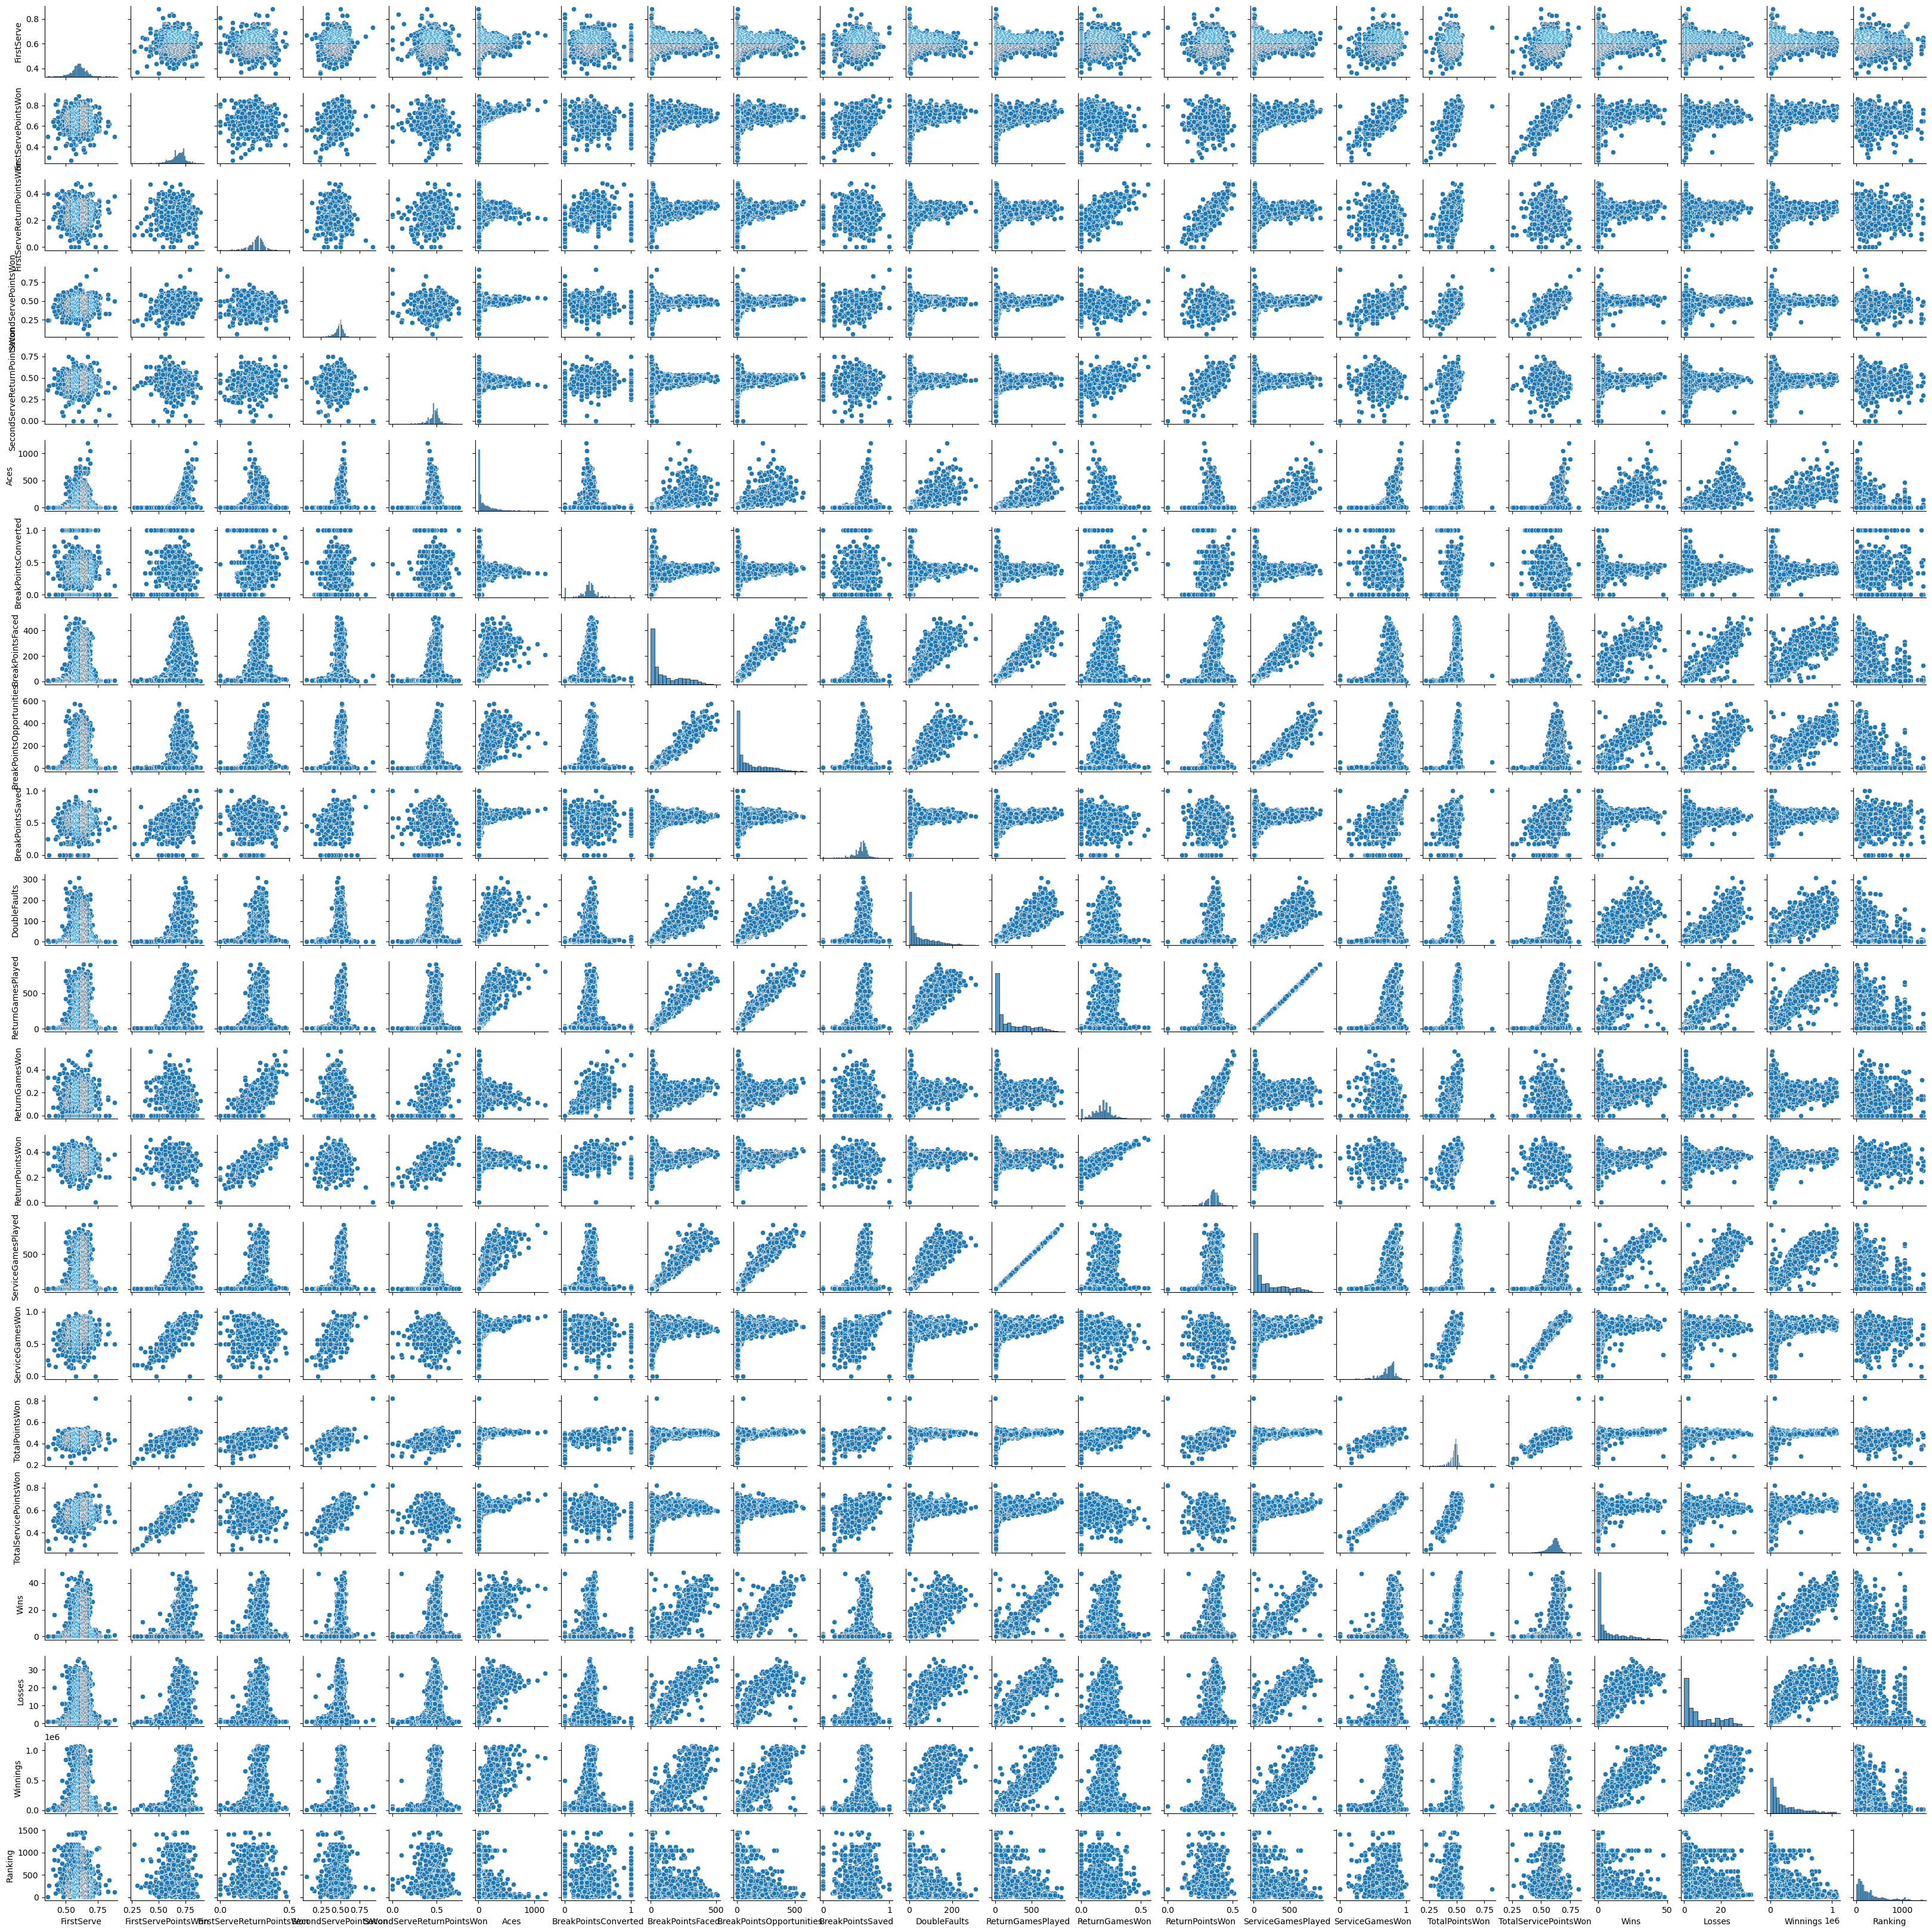

In [16]:
sns.pairplot(EDA_data, height = 1.5);
plt.show

# Correlation Analysis and Feature Selection

In [18]:
pd.options.display.float_format = '{:,.2f}'.format

In [19]:
EDA_data.corr()

FirstServe  FirstServePointsWon  \
FirstServe                        1.00                -0.07   
FirstServePointsWon              -0.07                 1.00   
FirstServeReturnPointsWon         0.03                 0.02   
SecondServePointsWon              0.10                 0.32   
SecondServeReturnPointsWon       -0.00                -0.00   
Aces                              0.05                 0.46   
BreakPointsConverted             -0.02                -0.04   
BreakPointsFaced                  0.06                 0.30   
BreakPointsOpportunities          0.06                 0.32   
BreakPointsSaved                  0.09                 0.41   
DoubleFaults                     -0.01                 0.37   
ReturnGamesPlayed                 0.07                 0.38   
ReturnGamesWon                   -0.01                -0.01   
ReturnPointsWon                   0.00                -0.00   
ServiceGamesPlayed                0.07                 0.38   
ServiceGamesWon                   0.14                 0.82   
TotalPointsWon                    0.15                 0.65   
TotalServicePointsWon             0.18                 0.86   
Wins                              0.06                 0.36   
Losses                            0.05                 0.33   
Winnings                          0.06                 0.36   
Ranking                          -0.07                -0.15   

                            FirstServeReturnPointsWon  SecondServePointsWon  \
FirstServe                                       0.03                  0.10   
FirstServePointsWon                              0.02                  0.32   
FirstServeReturnPointsWon                        1.00                  0.07   
SecondServePointsWon                             0.07                  1.00   
SecondServeReturnPointsWon                       0.30                  0.10   
Aces                                             0.14                  0.27   
BreakPointsConverted                             0.32                  0.05   
BreakPointsFaced                                 0.30                  0.26   
BreakPointsOpportunities                         0.31                  0.28   
BreakPointsSaved                                 0.05                  0.34   
DoubleFaults                                     0.24                  0.24   
ReturnGamesPlayed                                0.26                  0.30   
ReturnGamesWon                                   0.76                  0.10   
ReturnPointsWon                                  0.83                  0.10   
ServiceGamesPlayed                               0.26                  0.30   
ServiceGamesWon                                  0.09                  0.65   
TotalPointsWon                                   0.50                  0.62   
TotalServicePointsWon                            0.05                  0.71   
Wins                                             0.26                  0.27   
Losses                                           0.24                  0.25   
Winnings                                         0.24                  0.28   
Ranking                                         -0.18                 -0.18   

                            SecondServeReturnPointsWon  Aces  \
FirstServe                                       -0.00  0.05   
FirstServePointsWon                              -0.00  0.46   
FirstServeReturnPointsWon                         0.30  0.14   
SecondServePointsWon                              0.10  0.27   
SecondServeReturnPointsWon                        1.00  0.10   
Aces                                              0.10  1.00   
BreakPointsConverted                              0.26  0.04   
BreakPointsFaced                                  0.23  0.76   
BreakPointsOpportunities                          0.25  0.78   
BreakPointsSaved                                  0.07  0.28   
DoubleFaults                                      0.19  

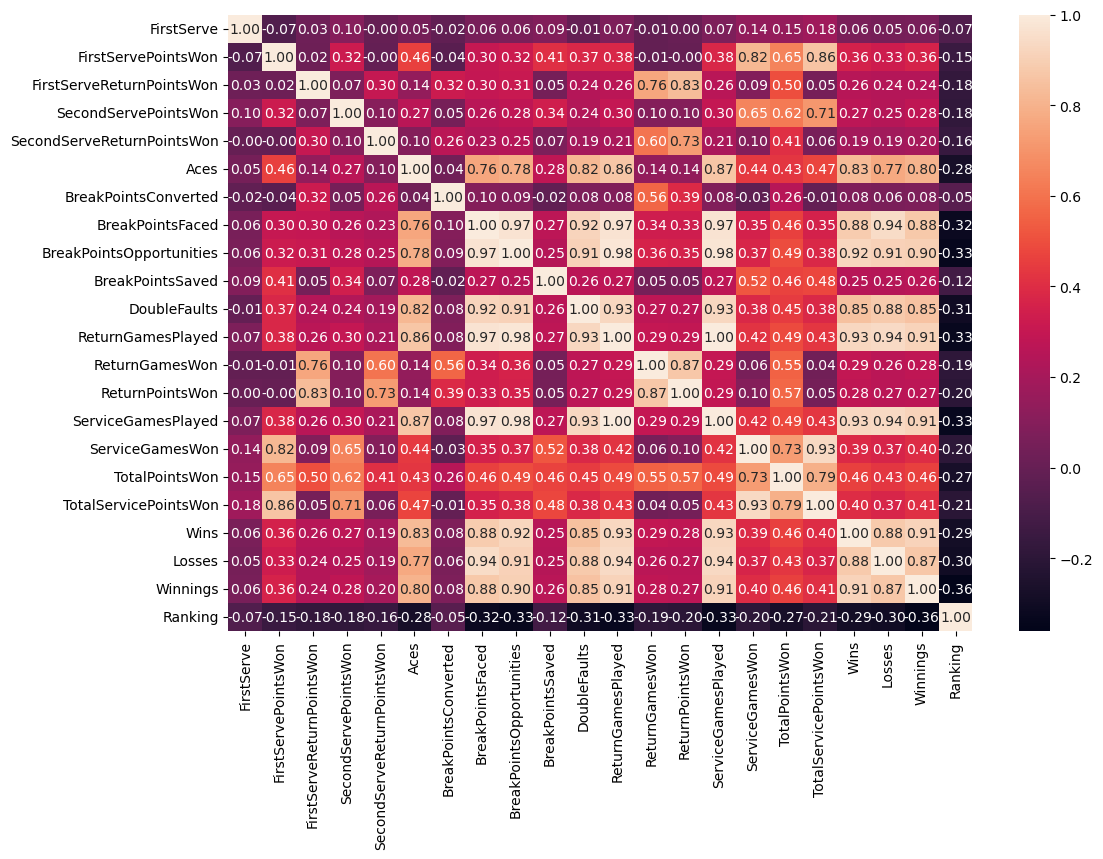

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(EDA_data.corr(), annot=True, fmt=".2f")
plt.show()

# Linear Regression with Scikit-Learn

In [69]:
data = EDA_data[["Aces","BreakPointsFaced","BreakPointsOpportunities","ServiceGamesPlayed","Winnings"]]

In [70]:
data.head()

Aces  BreakPointsFaced  BreakPointsOpportunities  ServiceGamesPlayed  \
0     0                 7                         7                   8   
1     7                 7                         0                   9   
2     2                10                         8                  17   
3     2                 5                         6                  15   
4     1                 2                         0                   2   

   Winnings  
0     39820  
1     17334  
2    109827  
3      9761  
4     32879

In [71]:
data.describe()

Aces  BreakPointsFaced  BreakPointsOpportunities  \
count 1,721.00          1,721.00                  1,721.00   
mean     97.11            112.00                    102.92   
std     137.97            119.25                    122.76   
min       0.00              1.00                      0.00   
25%       7.00             15.00                      9.00   
50%      34.00             55.00                     41.00   
75%     140.00            201.00                    172.00   
max   1,185.00            507.00                    573.00   

       ServiceGamesPlayed     Winnings  
count            1,721.00     1,721.00  
mean               197.65   234,492.76  
std                221.21   253,053.69  
min                  0.00       108.00  
25%                 22.00    49,311.00  
50%                 86.00   125,212.00  
75%                348.00   350,075.00  
max                916.00 1,074,562.00

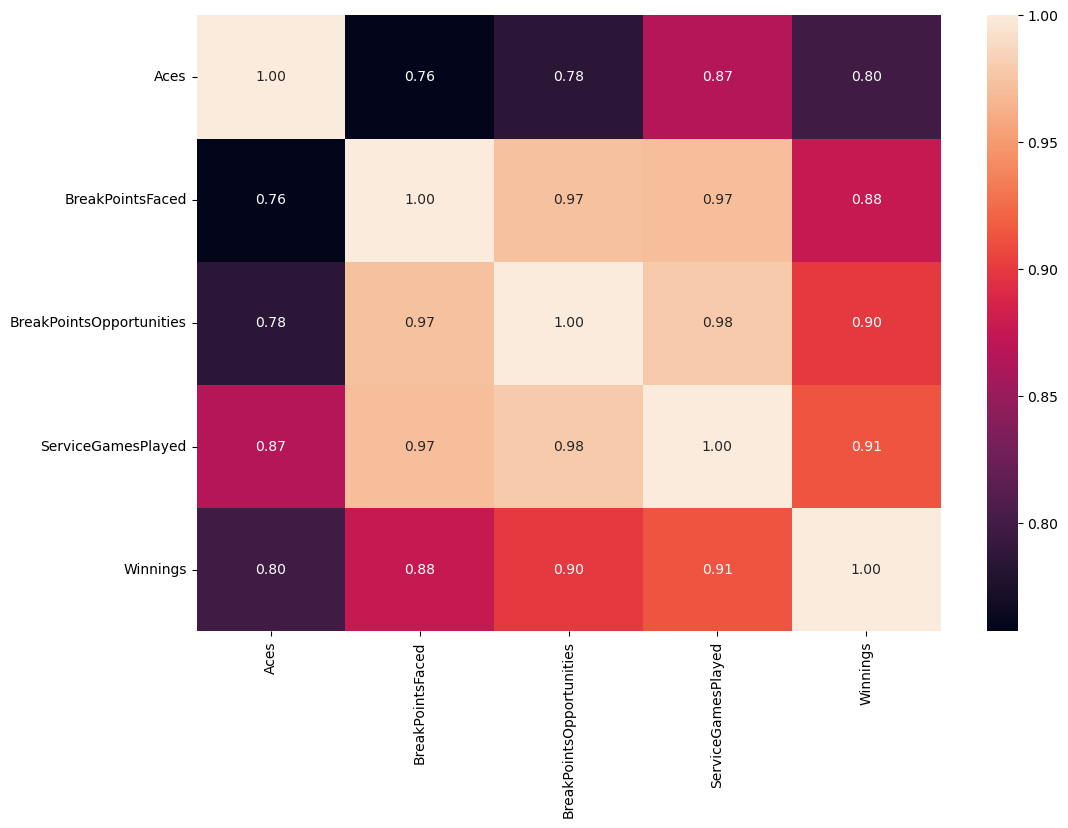

In [72]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()

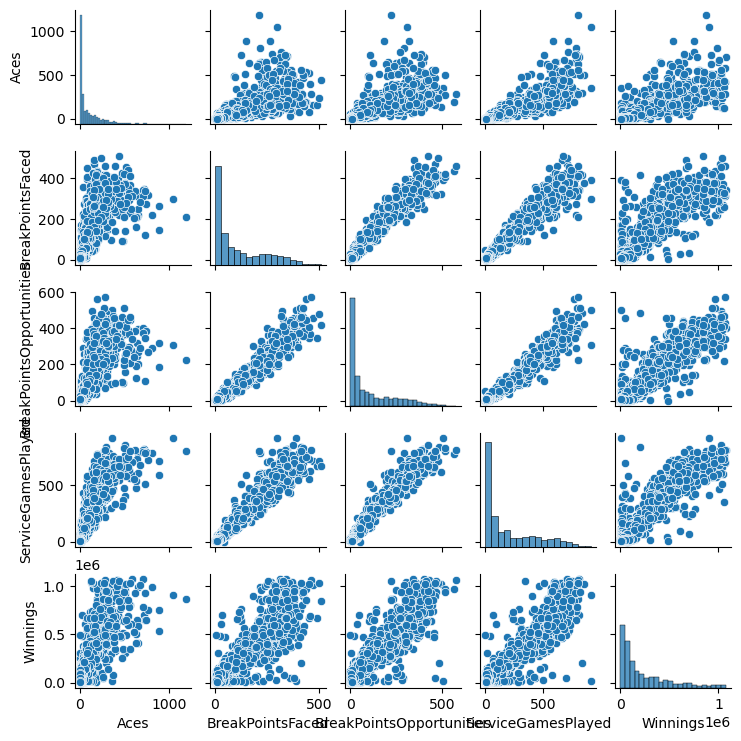

In [73]:
sns.pairplot(data, height = 1.5)
plt.show()

In [162]:
X = data.drop(columns=["Winnings"])
y = data.Winnings

In [163]:
X.head()

Aces  BreakPointsFaced  BreakPointsOpportunities  ServiceGamesPlayed
0     0                 7                         7                   8
1     7                 7                         0                   9
2     2                10                         8                  17
3     2                 5                         6                  15
4     1                 2                         0                   2

In [164]:
y.head()

0     39820
1     17334
2    109827
3      9761
4     32879
Name: Winnings, dtype: int64

In [165]:
mean_y = np.mean(y)
std_y = np.std(y)
y_z = (y-mean_y)/std_y

In [166]:
print(y_z[0])

-0.769517871751768


In [167]:
## print the results 
mean = np.mean(y_z)
std_dev = np.std(y_z)

# Print the mean and standard deviation rounded to two decimal places
print(f"Mean: {mean:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")

Mean: 0.00
Standard Deviation: 1.00


In [140]:
from sklearn.preprocessing import StandardScaler

# Assuming 'X' is your feature matrix (independent variables)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [141]:
print(X_scaled[:4])

[[-0.70403825 -0.88080566 -0.78156276 -0.85758527]
 [-0.6532864  -0.88080566 -0.83860039 -0.85306334]
 [-0.68953772 -0.85564062 -0.77341453 -0.81688789]
 [-0.68953772 -0.89758235 -0.789711   -0.82593175]]


In [168]:
model = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(X, y_z, train_size = 0.8, test_size = 0.2) 
model.fit(x_train,y_train)

LinearRegression()

In [169]:
model.coef_

array([ 0.00030143, -0.00214178,  0.00344819,  0.00326609])

In [170]:
model.intercept_

-0.7788209366553194

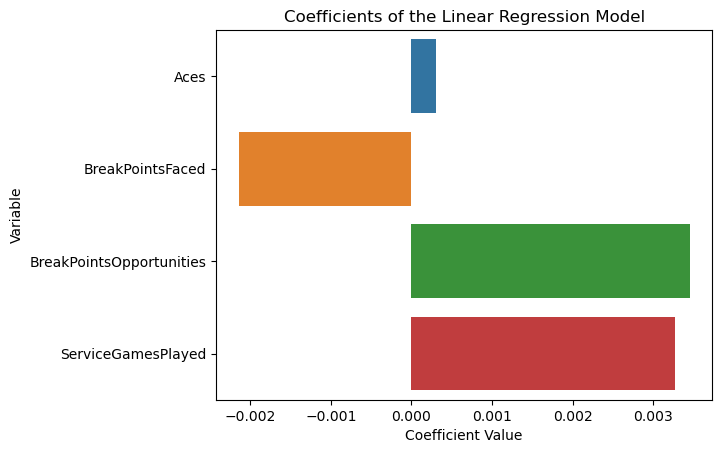

In [171]:
# Coefficient plot
coef_names = ["Aces","BreakPointsFaced","BreakPointsOpportunities","ServiceGamesPlayed"]
sns.barplot(x= model.coef_, y=coef_names)
plt.xlabel("Coefficient Value")
plt.ylabel("Variable")
plt.title("Coefficients of the Linear Regression Model")
plt.show()

# Model Evaluation

In [172]:
y_train_pred = model.predict(x_train)

In [173]:
y_test_pred = model.predict(x_test)

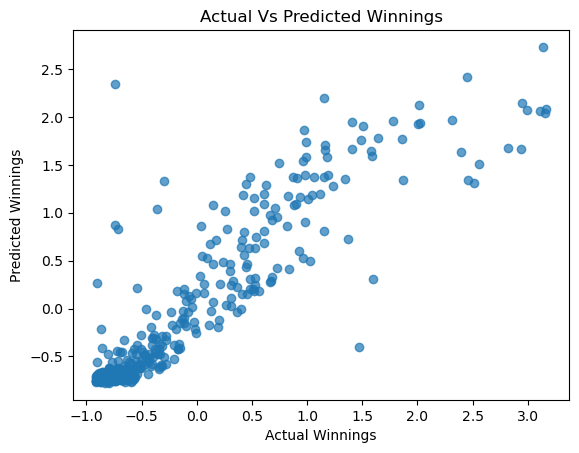

In [174]:
# Create a scatter plot
plt.scatter(y_test, y_test_pred, alpha=0.7)

# Create x-axis label and y-axis label
plt.xlabel("Actual Winnings")
plt.ylabel("Predicted Winnings")

# Create a title
plt.title("Actual Vs Predicted Winnings")

# Show the plot
plt.show()

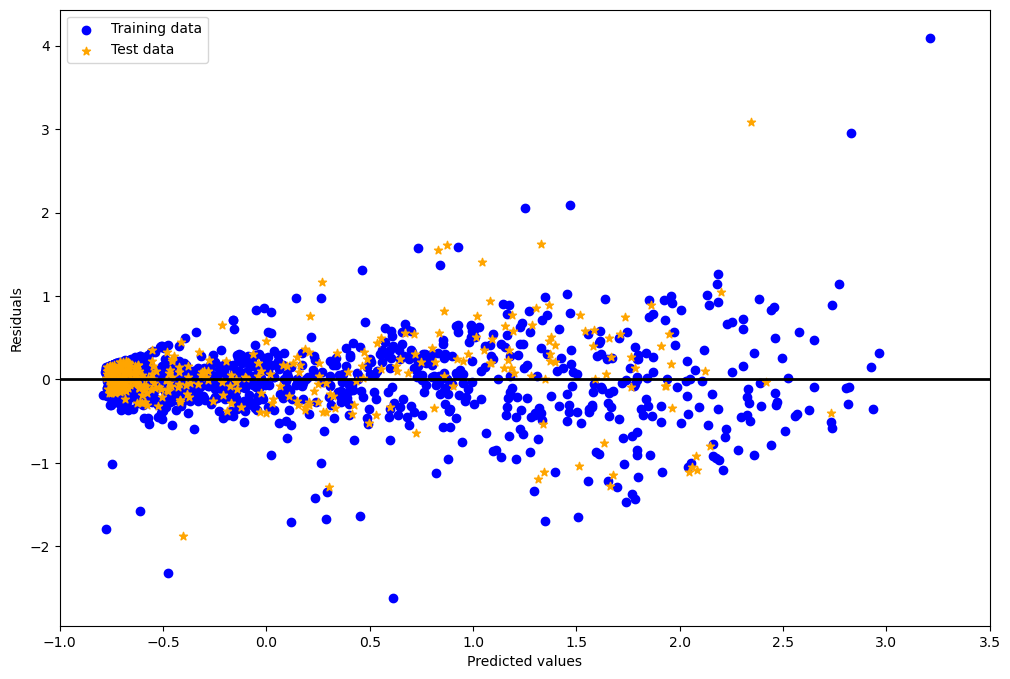

In [175]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='orange', marker='*', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-1, xmax=4, lw=2, color='k')
plt.xlim([-1, 3.5])
plt.show()

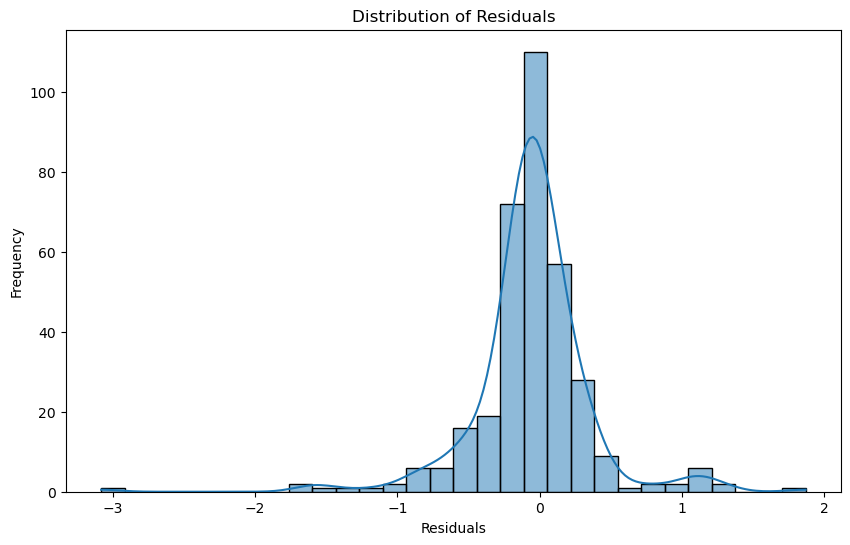

In [176]:
# Distribution of residuals
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

In [177]:
MSE_train = mean_squared_error(y_train, y_train_pred)
print("MSE_train:", round(MSE_train,2))

MSE_train: 0.16


In [178]:
MSE_test = mean_squared_error(y_test, y_test_pred)
print("MSE_test:", round(MSE_test,2))

MSE_test: 0.18


In [179]:
r2_score(y_train, y_train_pred)

0.8498790070594848

In [180]:
r2_score(y_test, y_test_pred)

0.7863313853850445

# Predict Winnings

In [186]:
your_statistics = [[0,7,7,8]]
winnings = model.predict(your_statistics)
print(winnings)

[-0.74354738]


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [187]:
original_value = np.mean(y) + np.std(y) * winnings
print(original_value)

[46390.01918594]
